<font color='green'>

**Welcome to Deep Learning Tutorial for Beginners**

**欢迎访问初学者的深度学习指南**

** [kaggle 英文原版](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners) **
** 作者: [DATAI](https://www.kaggle.com/kanncaa1) **
** 翻译: [陈沁悦](https://www.kaggle.com/qinyuechen) **
** 本文是根据原文翻译的，代表作者观点 **
** 译者注是译者自己的个人观点和业余活动，不代表本人供职公司的观点 **
** 本文纯属个人业余翻译，无偿分享，不承担由此造成的连带责任 **

* I am going to explain <u>every thing</u> one by one.
* 我会一条条把深度学习解释清楚。
* Instead of writing long and hard for reading paragraphs, I define and emphasize keywords line by line.
* 我没有去写长而难读的章节，相反定义和反复强调一条条的关键词。
* At the end of this tutorial, you will have enough information about deep learning to go deeper inside it.
* Lets look at content.
* 在这条指南的结尾，你会得到充足的深度学习的相关的信息，以便进一步深入了解。让我们开始看正文吧。

<font color='red'>
<br>正文:
* [介绍](#1)
* [数据集概览](#2)
* [逻辑回归](#3)
    * [计算图](#4)
    * [初始化参数](#5)
    * [前向传播](#6)
        * 激化函数 Sigmoid
        * 损失函数 Loss(error) Function
        * 代价函数 Cost Function
    * [用梯度下降优化算法](#7)
        * 后向传播
        * 更新参数
    * [用Sklearn做逻辑回归](#8)
    * [总结和提问](#9)
    
* [人工神经网络](#10)
    * [2层神经网络](#11)
        * [层数和初始化权重和偏置值参数](#12)
        * [前向传播](#13)
        * [损失函数和代价函数](#14)
        * [后向传播](#15)
        * [更新参数](#16)
        * [用学习到的权重和偏置值参数做预测](#17)
        * [创建模型](#18)
    * [L层神经网络](#19)
        * [用keras库实现](#22)
* 时间序列预测: https://www.kaggle.com/kanncaa1/time-series-prediction-with-eda-of-world-war-2
* [用Pytorch库的人工神经网络](#23)
* [用Pytorch库的卷积神经网络](#24)
* [用Pytorch库的循环神经网络](#25)
* [结论](#20)



<a id="1"></a> <br>
# INTRODUCTION
# 介绍
* **深度学习:**  一种从数据中直接学习特性的机器学习的技术
* **为什么深度学习:** 随着数据总量不断增长，机器学习的性能就不那么好了，而深度学习提供了更好的性能，比如更准确。
<a href="http://ibb.co/m2bxcc"><img src="http://preview.ibb.co/d3CEOH/1.png" alt="1" border="0"></a>
* **什么是大量:** 这一点并不容易回答，但是直觉上100万个样本足以称为”大量的数据“
* **深度学习的使用领域：** 语音识别，图像分类，自然语言处理或者推荐系统
* **机器学习和深度学习的区别：** 
    * 机器学习包含了深度学习。 
    * 机器学习的特征需要手工生成。
    * 而另一面，深度学习的特征是直接从数据中获得。
<a href="http://ibb.co/f8Epqx"><img src="http://preview.ibb.co/hgpNAx/2.png" alt="2" border="0"></a>

<br>让我们来看看数据吧。

In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# 我们这个 notebook 使用的python3的环境安装了很多有用的用于数据分析的库
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# 这个环境被封装成docker镜像"kaggle/python"：https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# 比如，我们在这里载入几个有用的库

import numpy as np # linear algebra 线性代数库
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 数据处理，CSV 文件 I/O
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# 数据输入文件在"../input/"目录中
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# 比如调用下面的代码会列出输入目录中的文件(通过点击 run 按钮 或者 按下快捷键 Shift+Enter)
# import warnings
# 载入 warning 库
import warnings
# filter warnings
# 过滤警告
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.
# 你写到 input目录中的文件都会被打印在下方。

Sign-language-digits-dataset
sign-language-digits-dataset.zip
X.npy
Y.npy



<a id="2"></a> <br>
# 数据集概览
* 我们将会在本指南中使用 "sign language digits data set" （数字符合语音数据集） 
* 在这个数据中有2062张用手势表示的数字符号图片
* 大家都知道数字是从0到9, 因此有10个数字符号。
* 在本文一开始，我们简化成只有0和1两个数字符号。 
* 在数据集中，符号0相关的图像的索引在204到408之间。 符号0的数量有205个。
* 同时符号1在822到1028之间。符号1的数量是206个。因此，我们每种符号各自使用205个样本。
* 说明：实际上对于深度学习来说，205个样本还是非常非常地少的。但是，作为一份指南，这影响不大。
* 让我们准备好我们的X和Y数组。X是由符号1和符号0的手势图像组成的数组, Y是标签数组（0和1)。

(-0.5, 63.5, 63.5, -0.5)

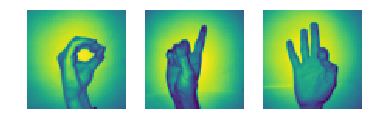

In [73]:
# 译者注：载入npy格式的数组文件，这是numpy存储数组的一种格式
x_l = np.load('input/Sign-language-digits-dataset/X.npy')
Y_l = np.load('input/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1, 3, 1)
# 译者注：大家可以通过改变x_l序号，看看不同手势符号
# 符号0图片
plt.imshow(x_l[205].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
# 符号1图片
plt.imshow(x_l[823].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
# 译者注：符号3图片，你还可以试试其他序号
plt.imshow(x_l[1].reshape(img_size, img_size))
plt.axis('off')

* 为了创建图像数组，我把0和1的数组连接到一起。
* 然后我为符号0图像数组创建了标签数组z，为符号1图像数组创建了标签数组o
* 译者注：不熟悉numpy的初学者，可以搜索”numpy.resharp 例子" 或者调用help(np.reshape)来看下它的用法 [python基础之numpy.reshape详解](https://www.jianshu.com/p/fc2fe026f002)

In [67]:
# Join a sequence of arrays along an row axis.
# 把一串数组的连接起来，统一编号
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # 从 0 到 204 是符号”0“ 从205到410是符号”1“
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
# 译者笔记：这里将z和o连接起来,然后变成一个410x1的数组
print(X.shape)
print(Y.shape)
# 去掉注释就可以阅读到np.reshape的帮助
# help(np.reshape)

(410, 64, 64)
(410, 1)


* X的形状是 (410, 64, 64)
    * 410表示我们有410张照片 (标志0和标志1的照片)
    * 64 表示我们照片的大小是64x64(64x64像素)
* Y的形状是(410,1)
    *  410 表示我们有410个标签(0和1组成) 
* 让我们把X,Y拆分成训练组和测试组
    * 参数 test_size = 测试大小的百分比. 测试占 15% 和 训练占 85% (译者注：原文这里标注成75%是计算错误。)
    * 参数 random_state = 42 我们使用相同的随机种子. 这意味着如果我们反复划分训练和测试组，他总是使用相同的训练和测试分布，因为我们使用相同的random_state参数值

In [64]:
# 让我们创建数组 x_train, y_train, x_test, y_test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train)
print(number_of_test)

348
62


* 现在我们有3维数组X 做为输入，但是我们要把降维到2维，才能把他变成我们第一个深度学习模型的输入
* 译者注：也就是通过numpy.reshape把64*64的二维数组变成4096的一维数组.
* 我们的标签数组(Y)已经是2维，所以我们不用动它。
* 让我们把X数组变平吧(图像数组).


In [5]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* 如你所见, 我们的训练数组中有348张图像，每张图像有4096个像素。
* 同时, 我们的测试数组有62张图像，每张图像也有4096个像素。
* 然后，我们对矩阵做转置，也就是做行和列的交换。
* 我知道你会问为什么要做置换，这里没有什么技术上的解释。你看到我后面写得代码就明白了。：）
* 译者注：如果你和我一样已经把线性代数基本还给大学老师了，请看一下百度百科，非常简单https://baike.baidu.com/item/%E8%BD%AC%E7%BD%AE%E7%9F%A9%E9%98%B5）

In [74]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


<font color='purple'>
到现在我们都做了什么:
* 为符号0和符号1创建了标签
* 创建了已经降维的训练和测试组
* 我们最终的输入(图像)和输出（标签和分类）看起来如图所示
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

<a id="3"></a> <br>
# 逻辑回归
* 当我们说到二元分类时（0和1的输出），我们就会立刻想到逻辑回归。
* 译者注：如果你和我一样看到回归两个字就很晕，可以看一下关于逻辑回归的解释。
（https://easyai.tech/ai-definition/logistic-regression/）
* 然而，在深度学习指南中，逻辑回归是指什么呢？
* 答案是逻辑回归是个非常简单的神经网络。
* 顺便说一嘴，神经网络和深度学习就是同一件东西。当我们讲到人工神经网络的时候，我会解释“deep”“深度”这个名词的具体含义。
* 为了能理解逻辑回归（简易深度学习），让我们先学习下计算图（computation graph）。 

<a id="4"></a> <br>
##  计算图
* 计算图是一个理解数学表达式的不错的方式。
* 它看起来像数序表达式的可视化展示。
* 比如说表达式 $$c = \sqrt{a^2 + b^2}$$
* 它的计算图如图所示. 如我们所见的，数学被用图形的方式表达出来
<a href="http://imgbb.com/"><img src="http://image.ibb.co/hWn6Lx/d.jpg" alt="d" border="0"></a>

* 让我们来看看逻辑回归的计算图吧。
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
    * 参数包括了 weight(权重)和 bias(偏置） 
    * Weights权重: 每个像素的系数
    * Bias偏置: 截距
    * z = (w.t)x + b  => z equals to (transpose of weights times input x) + bias 
    * z = (w.t)x + b  => z 等于 (系数乘以像素的转置) + 偏置值    
    * 换一种方式来说 => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * 通过激活函数Sigmoid可以将z做为参数，获得在0和1之间返回值。你可以在计算图中看到 sigmoid 函数
* 为什么我们要使用sigmoid函数?
    * 它给出了概率性的结果
    * 它是可导的，我们可以在梯度下降算法用到它。(我们很快就会看到它)
* 让我们来举个例子吧：
    * 比方说我们发现 z=4, 然后我们将 z做为参数传递给 sigmoid 函数。结果y_head的取值大概是0.9。它表示分类的结果有90%的概率是1。
* 现在让我们开始吧，挨个仔细练习计算图的每个部分吧。

<a id="5"></a> <br>
## 参数初始化
* 从前面的数据准备阶段，你知道我们的输入是4096像素的图片数组。（图片保存在 x_train 中）
* 每个数组有自己对应的权重。
* 第一步是每个像素乘以自己的权重。
* 但是，问题是权重的初始值应该是多少呢？ 
    * 关于权重初始化的一些技术，我会在人工神经网络中解释。但是，这一次初始化权重是0.01 
    * 好的，权重是0.01，那么权重数组的形状是什么样的？如你对计算图所理解的那样，它是(4096,1)
    * 译者注：我们的训练集的形状是x train:  (4096, 348)
    * 并且初始偏置值是0.
* 让我们来写代码吧。为了能在人工智能网络(ANN)等标题中反复使用这些代码，我定义了一个方法(method).

In [83]:
# 简单的定义方法示例
# 译者注：如果你已经学会 python, 不用管他
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# 让我们初始化参数吧
# 我们需要一个4096维的数组作为我们这个初始化权重方法的参数，每一维对应着一个像素。
# 译者注：initialize_weights_and_bias函数接受dimension做为参数，比如 dimension=4096, 
# 然后通过 np.full 创建一个4096维的长度为1的数组，并且通通赋值为0.01
# 译者注：np.full 返回一个根据指定shape和type,并用fill_value填充的新数组。
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
#help(np.full)

In [81]:
w,b = initialize_weights_and_bias(4096)
# 译者注：我们来看看参数的形状吧
print(w.shape)
print(b)

(4096, 1)
0.0


<a id="6"></a> <br>
## 前向传播
* 每一步通过像素计算代价的过程都可以称为前向传播。
    * z = (w.T)x + b => 在这个等式中我们知道x是像素数组，我们知道w(权重)和b(偏置值)，所以我们就只要通过计算就能知道z的值 (T是transpose转置运算)
    * 然后，我们将z代入sigmoid函数中，它返回一个y_head值（可能性）。如果你的思路看到这里感到混乱，那么就再去看一眼计算图。sigmoid函数的公式已经在计算图中表示出来。
    * 然后我们运算损失loss(error)函数
    * 代价函数是所有损失的总和 
    * 让我们从z和编写sigmoid方法开始吧。我们把z作为输入参数，返回y_head值（可能性）。 

In [84]:
# 计算z值
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [85]:
y_head = sigmoid(0)
y_head

0.5

我们写了sigmoid方法，也试着用它计算了y_head值。让我们来学习下损失函数吧
* 译者注：参考 
[分类问题之损失函数](https://zh.wikipedia.org/wiki/%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C%E4%B9%8B%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8)
* 让我们来举个例子吧， 我把一张图片作为输入，然后把它乘以相应的权重然后加上偏置值，然后得到z。然后，我把z代入sigmoid方法中，这样我得到了 y_head值。直到这里为止，我们知道我们在做什么。然后，比方说，y_head变成了0.9, 比0.5大，所以我们预测图像是符号1.OK，每一件事情看来是好的。但是，我们的预测是正确的吗？我们怎么检查这是对是错嘛？答案是通过损失函数：
    * 损失函数的数学表达式如下
    <a href="https://imgbb.com/"><img src="https://image.ibb.co/eC0JCK/duzeltme.jpg" alt="duzeltme" border="0"></a>
    * 它说你如果做了错误的预测，损失或者错误在变大。**DENKLEM DUZELTME**
        * 例子： 我们真实的图像是符号1并且它的标签也是1，然后我们的预测值 y_head=1。 当我们放入y和y_head放入损失公式，结果就是0.当我们做出正确预测时，我们的损失是0, 然而，如果我们做出的是错误的预测，比如 y_head=0,损失就是无穷大。
* 在这之后，代价函数是损失函数的总和。每个图片都有相应的损失函数。代价函数是这些图片的损失函数的总和。        
* 让我们来实现前向传播。


In [11]:
# 前向传播步骤:
# 计算 z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

<a id="7"></a> <br>
##  通过梯度下降优化算法
* 好的，现在我们知道我们的代价是错误 
* 因此，我们需要减少代价，因为我们知道如果成本高，它表示我们做出了错误的预测。 
* 让我们来想想第一步，一切都是从初始化权重和偏置值开始。因此代价依赖于他们。
* 为了降低代价，我们需要更新权重和偏置值。
* 换句话说, 我们的模型需要学习参数权重和偏置值，最小化代价函数。这项技术被称为梯度下降。
* 让我们举个例子:
    * 我们设置 w=5和 bias=0,所以现在忽略偏置值。然后，我们进行前向传播，我们的代价函数是1.5. 
    
    * 它看起来像这样 (红线)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/dAaYJH/7.jpg" alt="7" border="0"></a>
    * 如你所见在这幅图中， 我们当前的结果并不在代价函数的最低点。因此，我们需要达到代价最低点。好吧，让我们来更新权重。（符号:=表示为更新中） 
    * w := w - step. 问题是这里的距离(step)是什么意思？在当前，距离就是图中斜线slope1。好吧，这样的改变是显著的。为了找到最低点，我们使用斜率slope1.比如我们用 slope1 = 3，然后我们更新权重。w := w - slope1 => w = 2。
    * 现在我们的权重 w 是2，如你记得那样， 我们需要继续前向传播寻找最低代价值(cost)
    * 比如说根据前向传播，我们算出 w=2是，代价函数取值是0.4。我们这么做看起来是对的，因为代价函数取值变小了。我们得到了新的权重值，代价函数取值是0.4。这样够了吗？事实上我并不知道，所以我们再试一步。
    * Slope2 = 0.7 and w = 2. 让我们来更新权重 w : = w - step(slope2) => w = 1.3 权重现在是1.3. 让我们找出新的代价函数取值。
    * 再做了一次前向传播后， w=1.3 然后我们的代价 cost =0.3. 好吧，我们的代价变得更低， 它看起来不错。 但是它是不是足够好了呢或者我们是不是还要再执行一步呢？答案还是我不知道，让我们再试试。
    * Slope3 = 0.01 并且 w = 1.3. 更新权重 w := w - step(slope3) => w = 1.29 ~ 1.3. 这次权重并没有变化，因为我们找到了代价函数的最低点。 
    * 这一切看起来都不错，但是我们是怎么确定斜率的呢? 如果你还记得高中或者大学的课程，为了找到函数在某一指定点的斜率（代价函数的斜率），我们对这一点求导数. 也许你还会问，好吧我知道怎么求斜率了，但是怎么知道该往那边走呢？你会说也许顺着斜率，代价值也可能变大而不是走向最低点。我们的答案是斜率（导数）同时给出了距离和方向。因此不用担心。
    * 更新后的等式是这样的。他表示通过权重和偏置值计算得到的代价函数。根据权重和偏置值对代价函数求导，然后乘以α学习率，然后就可以更新权重值。（为了解释，我忽略了偏置值，但是所有的步骤都应该包含偏置值）
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="8" border="0"></a>
    * 现在，我确定你会问什么是学习率，我前面从没有提到过。它是非常直白的术语，它决定了学习率。然后，这里有个学习很快或者不学习的权衡。比如说你在巴黎（当前的代价），然后你想去马德里（最小代价）。如果你的速度（学习率）很慢，你会花很长时间才能到达马德里。但是，另一方面，如果你的速度（学习率）非常大，你可以跑得飞快但是有可能坠毁而永远到不了马德里。因此，我们要明智地选择速度（学习率）
    * 学习率也称为超参，需要被选择和调校。我会在人工神经网络中一起更详细介绍它和其他超参。现在，我们假设在前面的例子中学习率为1
    
* 我想现在你已经理解了前向传播的逻辑了（从权重和偏置值到代价）和后向传播（从代价来更新权重和偏置值）。而且你也学习了梯度下降。在实现代码前，你还要学习另外一件事情：我们怎么根据权重和偏置值对代价函数求导。这和Python或者编程无关。这是纯数学。有两个观点，第一个是用 Google搜索关于怎么对log loss函数求导， 第二个是google搜索什么是log loss函数的导数。我选择第二种因为我不说话就无法解释数学 ：）

$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_head - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_head-y)$$

In [12]:
# 在后序传播中，我们会使用前向传播得到的 y_head 
# 因此，我们把前向传播和后向传播绑在一起，而不是再写个后向传播的函数。
def forward_backward_propagation(w,b,x_train,y_train):
    # 前向传播
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # 后向传播
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

* 到这里，我们学习了：
    * 初始化参数 (已经实现)
    * 通过前向传播和代价函数寻找代价 (已经实现)
    * 更新（学习）参数（权重和偏置值）。让我们来实现它。


In [86]:
# 更新学习参数
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # 更新学习参数需要number_of_iterarion次迭代
    for i in range(number_of_iterarion):
        # 做前向和后向传播来寻找代价和梯度
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # 让我们来做更新
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # 我们更新了学习参数权重 weights 和偏置值 bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

* 哇, 我觉得累了 :) 到这里为止，我们已经学习了参数. 这表示我们适应了数据
* 为了预测，我们已经搞好了参数。那么，我们开始预测吧。
* 在预测步骤中，我们用测试集x_test做为输入。我们对它做前向预测。

In [87]:
 # 预测
def predict(w,b,x_test):
    # x_test 是前向传播的输入
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # 如果 z 大于 0.5, 我们的预测结果是符号1 (y_head=1),
    # 如果 z 小于 0.5,, 我们的预测结果是符号0 (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

* 我们做了预测。
* 现在让我们把所有工作串起来吧。

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


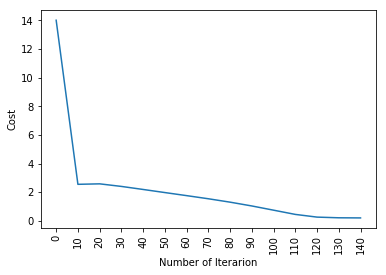

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [88]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

* 我们学习了简易神经网络（逻辑回归）背后的逻辑和怎么实现它。
* 现在我们已经学习了逻辑，我们接下来可以用sklearn库了，用它来实现这些逻辑回归的步骤更加容易。




<a id="8"></a> <br>
## 通过 Skylearn 做逻辑回归
* 在sklearn库中, 有个逻辑回归方法可以很容易地实现逻辑回归。 
* 我不打算解释sklearn逻辑回归用到的每个参数，但是如果你想要的话，可以读这篇文章 http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 但是，精确度和我们前面计算得到的是不一样的。因为逻辑回归函数还使用了其他很多我们没有在前面用到的特性，比如不同的优化参数和调整。
* 让我们对逻辑回归下个结论，然后开始人工智能网络部分吧。

In [89]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


<a id="9"></a> <br>
## 总结和问题
<font color='purple'>
在第一部分我们都做了什么:
* 初始化参数权重和偏置值
* 前向传播
* 损失函数
* 代价函数
* 后向传播 (梯度下降)
* 用学习到的参数权重和偏置值做预测
* 通过 Skylearn 进行逻辑回归

<br> 如果你在这里有问你可以问作者，因为接下来我们会构建逻辑回归的人工智能网络。
<br> 家庭作业: 这是一个不错的点，停下来做个联系吧. 你的作业是创建自己的逻辑回归方法来分类另外两个数字符号。

<a id="10"></a> <br>
# 人工神经网络 (ANN)
* 它也被称为深度神经网络或者深度学习
* **什么是神经网络:** 它是基本上是逻辑回归，并且执行两遍以上。
* 在逻辑回归中, 有输入层和输出层。然后，在神经网络中，在输入层和输出层之间至少还有一层隐藏的层
* **什么是深度, 多少层可以称为深度 ** 
When I ask this question to my teacher, he said that ""Deep" is a relative term; it of course refers to the "depth" of a network, meaning how many hidden layers it has. "How deep is your swimming pool?" could be 12 feet or it might be two feet; nevertheless, it still has a depth--it has the quality of "deepness". 32 years ago, I used two or three hidden layers. That was the limit for the specialized hardware of the day. Just a few years ago, 20 layers was considered pretty deep. In October, Andrew Ng mentioned 152 layers was (one of?) the biggest commercial networks he knew of. Last week, I talked to someone at a big, famous company who said he was using "thousands". So I prefer to just stick with "How deep?""
* **Why it is called hidden:** Because hidden layer does not see inputs(training set)
* For example you have input, one hidden and output layers. When someone ask you "hey my friend how many layers do your neural network have?" The answer is "I have 2 layer neural network". Because while computing layer number input layer is ignored. 
* Lets see 2 layer neural network: 
<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>
* Step by step we will learn this image.
    * As you can see there is one hidden layer between input and output layers. And this hidden layer has 3 nodes. If yoube curious why I choose number of node 3, the answer is there is no reason, I only choose :). Number of node is hyperparameter like learning rate. Therefore we will see hyperparameters at the end of artificial neural network.
    * Input and output layers do not change. They are same like logistic regression.
    * In image, there is a tanh function that is unknown for you. It is a activation function like sigmoid function. Tanh activation function is better than sigmoid for hidden units bacause mean of its output is closer to zero so it centers the data better for the next layer. Also tanh activation function increase non linearity that cause our model learning better.
    * As you can see with purple color there are two parts. Both parts are like logistic regression. The only difference is activation function, inputs and outputs.
        * In logistic regression: input => output
        * In 2 layer neural network: input => hidden layer => output. You can think that hidden layer is output of part 1 and input of part 2.
* Thats all. We will follow the same path like logistic regression for 2 layer neural network.
   
    
    

<a id="11"></a> <br>
## 2-Layer Neural Network
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model

<a id="12"></a> <br>
## Size of layers and initializing parameters weights and bias
* For x_train that has 348 sample $x^{(348)}$:
$$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$ 
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$

* At logistic regression, we initialize weights 0.01 and bias 0. At this time, we initialize weights randomly. Because if we initialize parameters zero each neuron in the first hidden layer will perform the same comptation. Therefore, even after multiple iterartion of gradiet descent each neuron in the layer will be computing same things as other neurons. Therefore we initialize randomly. Also initial weights will be small. If they are very large initially, this will cause the inputs of the tanh to be very large, thus causing gradients to be close to zero. The optimization algorithm will be slow.
* Bias can be zero initially.

In [17]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="13"></a> <br>
## Forward propagation
* Forward propagation is almost same with logistic regression.
* The only difference is we use tanh function and we make all process twice.
* Also numpy has tanh function. So we do not need to implement it.

In [18]:

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


<a id="14"></a> <br>
## Loss function and Cost function
* Loss and cost functions are same with logistic regression
* Cross entropy function
<a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

In [19]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


<a id="15"></a> <br>
## Backward propagation
* As you know backward propagation means derivative.
* If you want to learn (as I said I cannot explain without talking bc it is little confusing), please watch video in youtube.
* However the logic is same, lets write code.

In [20]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="16"></a> <br>
## Update Parameters 
* Updating parameters also same with logistic regression.
* We actually do alot of work with logistic regression

In [21]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<a id="17"></a> <br>
## Prediction with learnt parameters weight and bias
* Lets write predict method that is like logistic regression.

In [22]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
## Create Model
* Lets put them all together

Cost after iteration 0: 0.261708
Cost after iteration 100: 0.312137
Cost after iteration 200: 0.332465
Cost after iteration 300: 0.340154
Cost after iteration 400: 0.343000
Cost after iteration 500: 0.344043
Cost after iteration 600: 0.344422
Cost after iteration 700: 0.344557
Cost after iteration 800: 0.344600
Cost after iteration 900: 0.344610
Cost after iteration 1000: 0.344605
Cost after iteration 1100: 0.344594
Cost after iteration 1200: 0.344577
Cost after iteration 1300: 0.344555
Cost after iteration 1400: 0.344525
Cost after iteration 1500: 0.344481
Cost after iteration 1600: 0.344414
Cost after iteration 1700: 0.344297
Cost after iteration 1800: 0.344045
Cost after iteration 1900: 0.343395
Cost after iteration 2000: 0.340726
Cost after iteration 2100: 0.326774
Cost after iteration 2200: 0.302901
Cost after iteration 2300: 0.270014
Cost after iteration 2400: 0.229145


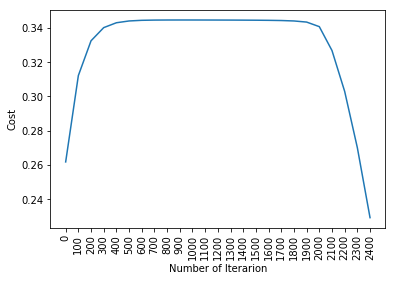

train accuracy: 94.25287356321839 %
test accuracy: 95.16129032258064 %


In [23]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

<font color='purple'>
Up to this point we create 2 layer neural network and learn how to implement
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model

<br> Now lets learn how to implement L layer neural network with keras.

<a id="19"></a> <br>
# L Layer Neural Network
* **What happens if number of hidden layer increase:** Earlier layerls can detect simple features.
* When model composing simple features together in later layers of neural network that it can learn more and more complex functions. For example, lets look at our sign one.
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* For example first hidden layer learns edges or basic shapes like line. When number of layer increase, layers start to learn more complex things like convex shapes or characteristic features like forefinger.
* Lets create our model
    * There are some hyperparameters we need to choose like learning rate, number of iterations, number of hidden layer, number of hidden units, type of activation functions. Woww it is too much :)
    * These hyperparameters can be chosen intiutively if you spend a lot of time in deep learning world.
    * However, if you do not spend too much time, the best way is to google it but it is not necessary. You need to try hyperparameters to find best one.
    * In this tutorial our model will have 2 hidden layer with 8 and4 nodes, respectively. Because when number of hidden layer and node increase, it takes too much time. 
    * As a activation function we will use relu(first hidden layer), relu(second hidden layer) and sigmoid(output layer) respectively.
    * Number of iteration will be 100.
* Our way is same with previous parts however as you learn the logic behind deep learning, we can ease our job and use keras library for deeper neural networks.
* First lets reshape our x_train, x_test, y_train and y_test.

    
    

In [24]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

<a id="22"></a> <br>
## Implementing with keras library
Lets look at some parameters of keras library:
* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, we use relu
* input_dim: input dimension that is number of pixels in our images (4096 px)
* optimizer: we use adam optimizer
    * Adam is one of the most effective optimization algorithms for training neural networks.
    * Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters
* loss: Cost function is same. By the way the name of the cost function is cross-entropy cost function that we use previous parts.
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$
* metrics: it is accuracy.
* cross_val_score: use cross validation. If you do not know cross validation please chech it from my machine learning tutorial. https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* epochs: number of iteration

In [25]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/100
232/232 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5259
Epoch 2/100
232/232 [==============================] - 0s 58us/step - loss: 0.6928 - accuracy: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 57us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 56us/step - loss: 0.6920 - accuracy: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 53us/step - loss: 0.6914 - accuracy: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 55us/step - loss: 0.6901 - accuracy: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 54us/step - loss: 0.6881 - accuracy: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 54us/step - loss: 0.6869 - accuracy: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 54us/step - loss: 0.6849 - accuracy: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 55us/step - loss: 0.6827

232/232 [==============================] - 0s 66us/step - loss: 0.0831 - accuracy: 0.9784
Epoch 60/100
232/232 [==============================] - 0s 67us/step - loss: 0.0780 - accuracy: 0.9784
Epoch 61/100
232/232 [==============================] - 0s 69us/step - loss: 0.0776 - accuracy: 0.9741
Epoch 62/100
232/232 [==============================] - 0s 63us/step - loss: 0.0734 - accuracy: 0.9828
Epoch 63/100
232/232 [==============================] - 0s 64us/step - loss: 0.0709 - accuracy: 0.9784
Epoch 64/100
232/232 [==============================] - 0s 62us/step - loss: 0.0804 - accuracy: 0.9784
Epoch 65/100
232/232 [==============================] - 0s 64us/step - loss: 0.0685 - accuracy: 0.9784
Epoch 66/100
232/232 [==============================] - 0s 62us/step - loss: 0.0706 - accuracy: 0.9828
Epoch 67/100
232/232 [==============================] - 0s 64us/step - loss: 0.0726 - accuracy: 0.9784
Epoch 68/100
232/232 [==============================] - 0s 64us/step - loss: 0.0635 - 

<a id="23"></a> <br>
## Artificial Neural Network with Pytorch library.
* Pytorch is one of the frame works like keras.
* It eases implementing and constructing deep learning blocks.  
* Artificial Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

<a id="24"></a> <br>
## Convolutional Neural Network with Pytorch library.
* Pytorch is one of the frame works like keras.
* It eases implementing and constructing deep learning blocks.  
* Convolutional Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

<a id="25"></a> <br>
## Recurrent Neural Network with Pytorch library.
* Pytorch is one of the frame works like keras.
* It eases implementing and constructing deep learning blocks.  
* Recurrent Neural Network: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch

<a id="20"></a> <br>
# Conclusion
* First of all thanks for this data set.
* If you see my wrong spelling (it can be so much) please ignore them :)
* This tutorial is shallow, if you want more detail about some concepts you can comment.
* If you think that I cannot explain some concepts please learn it from youtube(especially Andrew) and then continue.
* If you do not understand some thing that is related with python or machine learning please check my other tutorials
    * Data Science: https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners
    * Machine learning: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
* Now I hope you understand and learn what is deep learning. However, we do not write long codes for each time to build deep learning model. Therefore, there are a deep learning frame works to build deep learning models fast and easy.
    * Artificial Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * Convolutional Neural Network: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
    * Recurrent Neural Network: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
     

### <br>如果你喜欢他，请问作者点赞。
## <br> 如果你有任何问题，我非常高兴听到他。
